In [20]:
%matplotlib notebook

import sys
import os
sys.path.append('{}/code/raspi_thermometer/raspi_thermometer'.format(os.path.expanduser("~")))

from aws_utils import scan
import matplotlib.pyplot as plt
import pandas as pd


%load_ext autoreload
%autoreload 2

In [23]:
data = scan()

In [24]:
data['ResponseMetadata']

{'RequestId': '0FGC2AGRH4L25F3DUJH1E8N3QFVV4KQNSO5AEMVJF66Q9ASUAAJG',
 'HTTPStatusCode': 200,
 'HTTPHeaders': {'server': 'Server',
  'date': 'Tue, 25 Dec 2018 03:10:08 GMT',
  'content-type': 'application/x-amz-json-1.0',
  'content-length': '808937',
  'connection': 'keep-alive',
  'x-amzn-requestid': '0FGC2AGRH4L25F3DUJH1E8N3QFVV4KQNSO5AEMVJF66Q9ASUAAJG',
  'x-amz-crc32': '3813013128'},
 'RetryAttempts': 0}

In [25]:
df = pd.DataFrame(data['Items']).sort_values(by=['timestamp']).reset_index(drop=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['temperature'] = df['temperature'].astype(float)

In [41]:
for m in ['temperature','humidity']:
    df['{}_smoothed'.format(m)] = df[m].rolling(30,center=True).mean()

In [42]:
df.tail()

,humidity,temperature,timestamp,temperature_smoothed,humidity_smoothed
8421,55,23.0,2018-12-24 19:05:10.943909,NaN,NaN
8422,55,23.0,2018-12-24 19:06:05.694926,NaN,NaN
8423,55,23.0,2018-12-24 19:07:05.557457,NaN,NaN
8424,55,23.0,2018-12-24 19:08:07.925897,NaN,NaN
8425,54,24.0,2018-12-24 19:09:08.238742,NaN,NaN


<IPython.core.display.Javascript object>


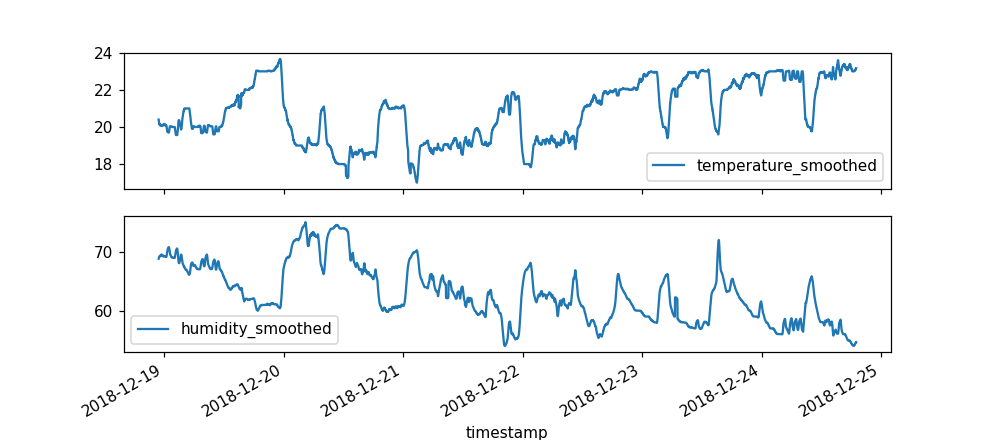

In [44]:
fig,ax=plt.subplots(2,1,figsize=(9,4),sharex=True)
# df.plot(x='timestamp',y='temperature',ax=ax)
df.plot(x='timestamp',y='temperature_smoothed',ax=ax[0])
df.plot(x='timestamp',y='humidity_smoothed',ax=ax[1])

<IPython.core.display.Javascript object>


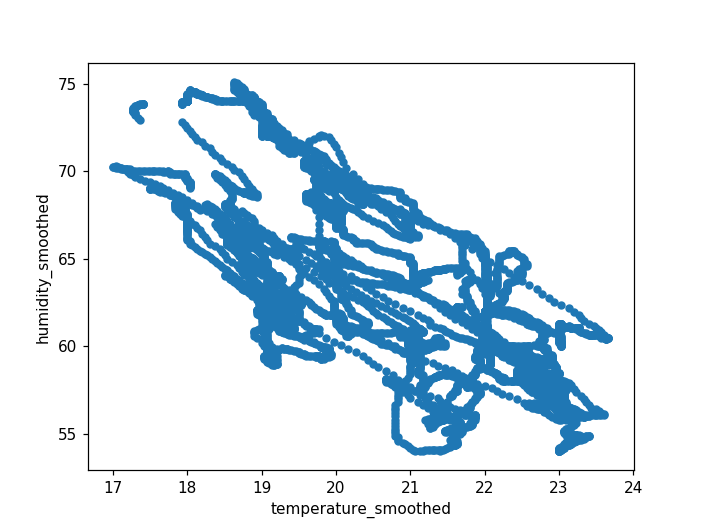

In [45]:
df.plot(x='temperature_smoothed',y='humidity_smoothed',kind='scatter')